In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import numpy as np

sys.path.append("../")
import utils
import networkx as nx

In [2]:
def readucr(filename):
    data = np.loadtxt(filename)
    return data[:, 1:], data[:, 0].astype(int)

In [3]:
df, labels = readucr(
    "../data/DistalPhalanxOutlineAgeGroup/DistalPhalanxOutlineAgeGroup_TRAIN.txt"
)

In [4]:
np.unique(labels, return_counts=True)

(array([1, 2, 3]), array([ 30, 113, 257]))

In [26]:
df, labels = readucr("../data/GunPoint/GunPoint_VAL.txt")

In [27]:
np.unique(labels, return_counts=True)

(array([1, 2]), array([25, 25]))

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    df, labels, test_size=2 / 3, stratify=labels
)

In [28]:
y_test2 = y_test[:, np.newaxis]

In [15]:
y_train2

array([[1],
       [2],
       [1],
       [2],
       [2],
       [1],
       [2],
       [2],
       [1],
       [1],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [2],
       [1],
       [2],
       [2],
       [1],
       [2],
       [1],
       [1],
       [2],
       [2],
       [1],
       [1],
       [2],
       [1],
       [2],
       [1],
       [2],
       [1],
       [1]])

In [29]:
tmp = np.concatenate((y_test2, X_test), axis=1)

In [22]:
tmp

array([[ 1.        , -1.1895986 , -1.1918733 , ..., -0.94971993,
        -0.99153509, -1.0513007 ],
       [ 2.        , -0.64073833, -0.64155947, ..., -0.72131188,
        -0.72032674, -0.72183899],
       [ 1.        , -0.74394753, -0.74393601, ..., -0.7424381 ,
        -0.7423258 , -0.74316341],
       ...,
       [ 2.        , -1.8479016 , -1.9084959 , ..., -1.3457913 ,
        -1.5610792 , -1.7432134 ],
       [ 1.        , -0.72543894, -0.73081913, ..., -0.7267571 ,
        -0.72660712, -0.72741557],
       [ 1.        , -1.2495312 , -1.2521122 , ..., -1.0671883 ,
        -1.070098  , -1.069167  ]])

In [25]:
np.savetxt("../data/GunPoint/GunPoint_TEST2.txt", tmp, fmt="%.07e")

In [5]:
df = pd.DataFrame(df.T)
# każdy time series ma swoją kolumnę
df.shape

(463, 175)

190


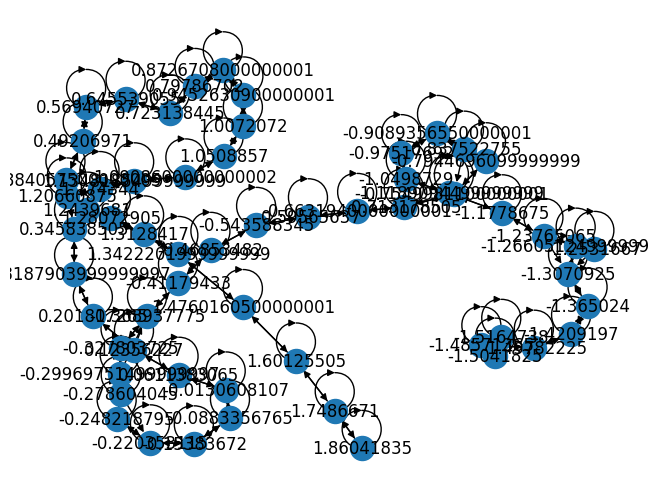

187


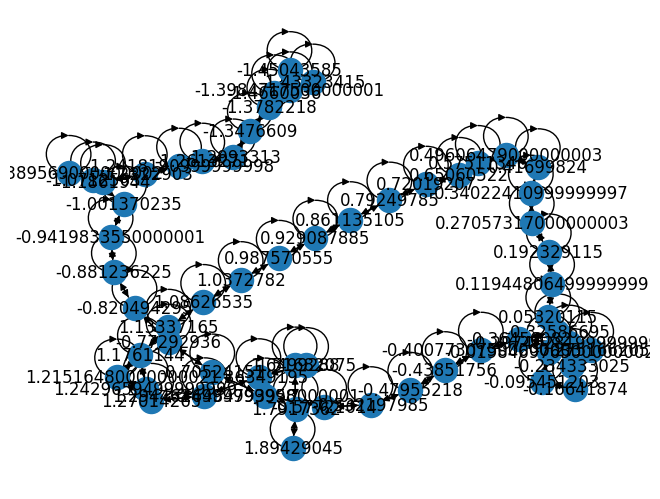

187


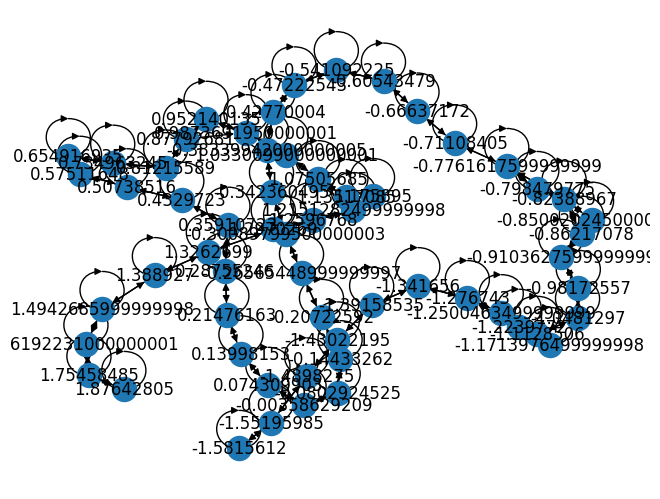

191


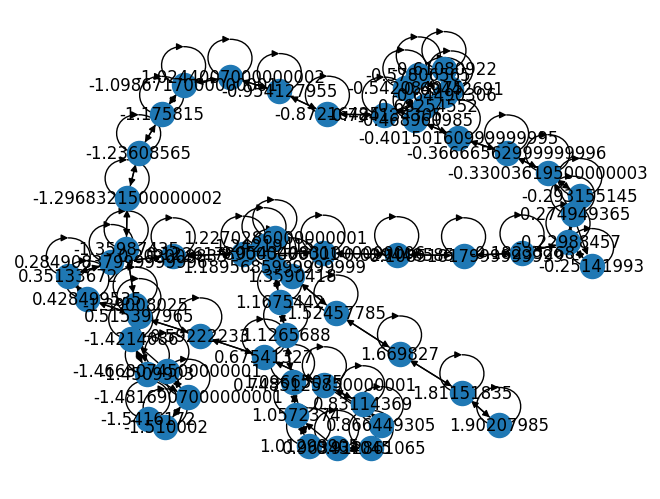

In [14]:
for it in range(0, len(df.columns), 50):
    # G=utils.df_to_visibility_graph(df.T,y_col=it)
    G = utils.df_to_quantile_graph(df, y_col=it, n_quantiles=60)
    pos = nx.spring_layout(G)
    val = nx.get_node_attributes(G, "x")
    nx.draw(G, pos, labels=val)
    print(len(G.edges))
    # labels = nx.get_edge_attributes(G,'weight')
    # nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
    plt.show()

In [15]:
len(G.edges)

191

In [16]:
tmp = utils.GraphDataset("../data/", "MedicalImages", False, True)

(760, 99)


In [17]:
np.unique(tmp[0].x, return_counts=True)

(array([-6.3147092e-01, -5.9703451e-01, -5.2188468e-01, -4.7979653e-01,
        -4.7650665e-01, -4.7170159e-01, -4.6542245e-01, -4.6028587e-01,
        -4.5728341e-01, -4.4992462e-01, -4.3949845e-01, -4.3491012e-01,
        -4.3184701e-01, -4.2756626e-01, -4.2501897e-01, -4.2257547e-01,
        -4.1901365e-01, -4.1390395e-01, -4.0990821e-01, -4.0672100e-01,
        -4.0179473e-01, -3.9711559e-01, -3.9425373e-01, -3.9275473e-01,
        -3.9159518e-01, -3.8965967e-01, -3.8832578e-01, -3.8652101e-01,
        -3.8446110e-01, -3.8128403e-01, -3.7520459e-01, -3.6900321e-01,
        -3.6381295e-01, -3.6028743e-01, -3.5813957e-01, -3.5649142e-01,
        -3.5432127e-01, -3.5112831e-01, -3.4681031e-01, -3.4156767e-01,
        -3.3608469e-01, -3.3109471e-01, -3.2878417e-01, -3.2758936e-01,
        -3.2591566e-01, -3.2380337e-01, -3.2013956e-01, -3.1511548e-01,
        -3.0837807e-01, -3.0144459e-01, -2.9828054e-01, -2.9716396e-01,
        -2.9153463e-01, -2.8347000e-01, -2.7922979e-01, -2.77135